In [3]:
!pip install pandas


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 3.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 3.1 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.0 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.1 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 3.4 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/11.0 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 3.7 MB/s eta 0:00:01
   ----------

In [11]:
import pandas as pd

df = pd.read_csv(r"C:\Users\india\Documents\Customer_Churn_Prediction\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Drop customerID since it's not useful for prediction
df = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric (some values are spaces or empty)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges (if any)
df = df.dropna()

# Convert target variable Churn from Yes/No to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Show first 5 rows
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [13]:
!pip install scikit-learn

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5625, 30)
X_test shape: (1407, 30)
y_train shape: (5625,)
y_test shape: (1407,)


In [15]:
!pip install -U imbalanced-learn

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check class balance
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))


Before SMOTE: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({1: 4130, 0: 4130})


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_sm, y_train_sm)

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1033
           1       0.49      0.73      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407



In [18]:
from sklearn.metrics import confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))


[[846 187]
 [135 239]]
AUC Score: 0.7290056478456911


In [20]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.6 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.7 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.6 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.6 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.6 MB/s eta 0:00:04
   ---------------- ----------------------- 3.4/8.1 MB 1.8 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 2.0 MB/s eta 0:00:02
   ------------------------ ------------

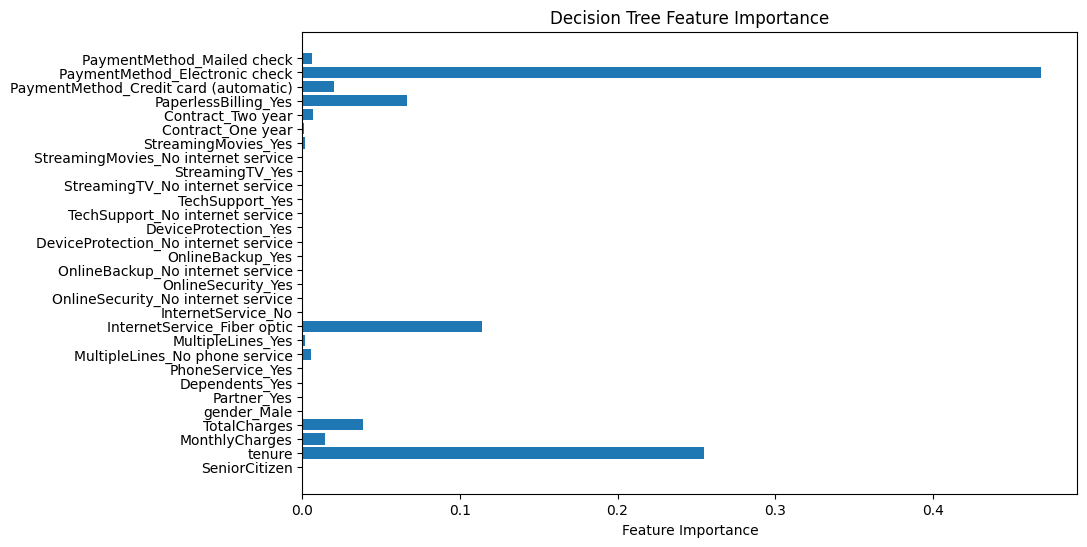

In [21]:
import matplotlib.pyplot as plt

importances = dt.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()


In [22]:
!pip install joblib


In [23]:
import joblib

# Save the model
joblib.dump(dt, "decision_tree_model.pkl")

# Save the list of columns used during training
joblib.dump(X.columns.tolist(), "model_features.pkl")

print("Model and features saved successfully!")


Model and features saved successfully!


In [24]:
import joblib
import pandas as pd

# 1. Load the trained model and feature names
model = joblib.load("decision_tree_model.pkl")
features = joblib.load("model_features.pkl")

# 2. Create a new customer input (this is just an example)
# 👉 You must use the same features and order as in the original training data

new_customer_data = {
    'tenure': 12,
    'MonthlyCharges': 70.5,
    'TotalCharges': 845.0,
    'gender_Male': 1,
    'SeniorCitizen': 0,
    'Partner_Yes': 1,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'MultipleLines_Yes': 0,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_Yes': 1,
    'DeviceProtection_Yes': 1,
    'TechSupport_Yes': 0,
    'StreamingTV_Yes': 1,
    'StreamingMovies_Yes': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaperlessBilling_Yes': 1,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'OnlineSecurity_No internet service': 0,
    'OnlineBackup_No internet service': 0,
    'DeviceProtection_No internet service': 0,
    'TechSupport_No internet service': 0,
    'StreamingTV_No internet service': 0,
    'StreamingMovies_No internet service': 0
}

# 3. Convert to DataFrame with the correct column order
new_customer_df = pd.DataFrame([new_customer_data], columns=features)

# 4. Make prediction
prediction = model.predict(new_customer_df)

# 5. Display result
print("Prediction:", "Churn" if prediction[0] == 1 else "No Churn")


Prediction: Churn


In [25]:
pip install streamlit


   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.1 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/10.1 MB 1.9 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/10.1 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/10.1 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/10.1 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/10.1 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/10.1 MB 2.2 MB/s eta 0:00:04
   --------------- ------------------------ 3.9/10.1 MB 2.2 MB/s eta 0:00:03
   ---------------- ----------------------- 4.2/10.1 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 4.5/10.1 MB 2.1 MB/s eta 0:00:03
   ------------------ --------------------- 4.7/10.1 MB 2.1 MB/s eta 0:00:03
   ----------